In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load the data from CSV file
df = pd.read_csv('ab-testing.csv')


In [4]:
# Get the number of rows and columns
num_rows, num_cols = df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 45883
Number of columns: 8


In [5]:
df.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


In [6]:
print(df.columns)


Index(['uid', 'country', 'gender', 'spent', 'purchases', 'date', 'group',
       'device'],
      dtype='object')


In [7]:
# Perform one-hot encoding on the categorical variables
df = pd.get_dummies(df, columns=['country', 'gender'])

In [8]:
df.head(5)

,uid,spent,purchases,date,group,device,country_AUS,country_BRA,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_MEX,country_TUR,country_USA,gender_F,gender_M
0,11115722,1595,5,2016-03-08,GRP B,I,0,0,0,0,0,0,0,1,0,0,1,0
1,11122053,498,2,2017-07-14,GRP B,I,0,0,0,0,0,0,0,0,0,1,0,1
2,11128688,2394,6,2017-09-17,GRP A,I,0,0,0,0,0,0,0,0,0,1,1,0
3,11130578,1197,3,2017-11-30,GRP A,I,0,0,0,0,0,0,0,0,0,1,1,0
4,11130759,1297,3,2018-01-10,GRP B,A,0,0,0,0,1,0,0,0,0,0,0,1


In [13]:
# Define the features and target
X = df.drop(['group', 'date', 'uid', 'device'], axis=1).values
y = df['group'].values

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Create the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


In [16]:
# Train the model
rfc.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [17]:
 # Predict on the test set
y_pred = rfc.predict(X_test)

In [18]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5092078021139806


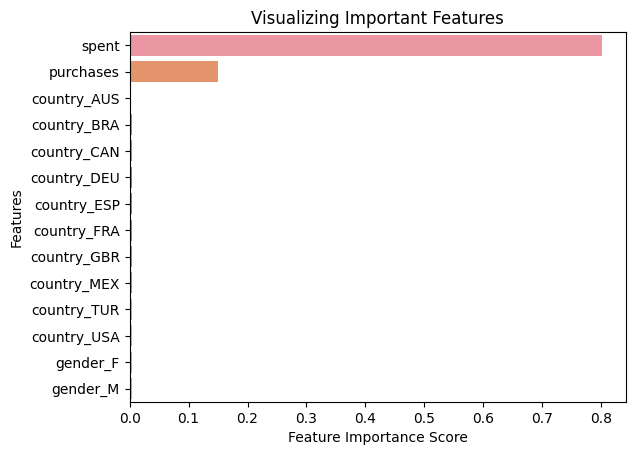

In [19]:
    
# Visualize the feature importances
feature_importances = pd.Series(rfc.feature_importances_, index=df.drop(['group', 'date', 'uid', 'device'], axis=1).columns)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


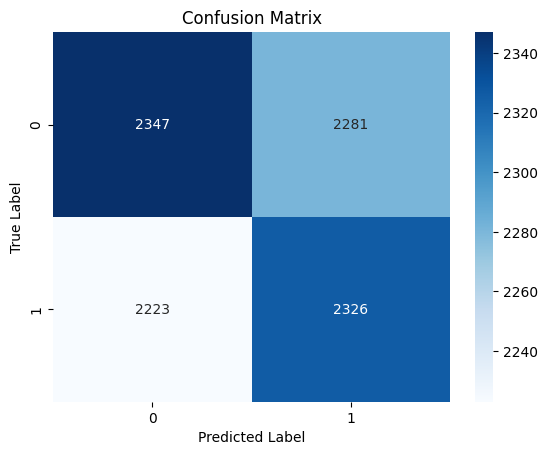

In [20]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['GRP A', 'GRP B'])

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()